<a href="https://colab.research.google.com/github/mlacasa/AnalisisSeries/blob/main/An%C3%A1lisisUnivariante(I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nota, no hace falta que toquéis código, simplemente ejecutar con las flechitas. Pero es recomendable "jugar" y modificar. También podéis ordenar mediante la IA generativa.

#ANÁLISIS UNIVARIANTE

El análisis univariante se centra en el estudio de una sola variable a la vez en una serie estadística. Los tipos de valores que podemos encontrar en este tipo de análisis incluyen:

Valores Numéricos: Son aquellos que representan cantidades y pueden ser continuos o discretos.

Continuos: Valores que pueden tomar cualquier número dentro de un rango (ejemplo: altura de personas, temperaturas).
Discretos: Valores que solo pueden tomar números enteros (ejemplo: número de hijos en una familia, cantidad de productos vendidos).
Valores Categóricos: Son aquellos que se utilizan para clasificar datos en categorías o grupos. Estos pueden ser:

Nominales: No tienen un orden específico (ejemplo: tipos de frutas como manzana, plátano, naranja).
Ordinales: Tienen un orden o jerarquía (ejemplo: niveles de satisfacción como bajo, medio, alto).
Valores Binarios: Un caso especial de valor categórico que solo tiene dos categorías posibles (ejemplo: sí/no, verdadero/falso).

Valores de Tiempo: Se refieren a datos que representan momentos específicos en el tiempo (ejemplo: fechas de transacciones, edades).

Valores Textuales: Estos incluyen datos en forma de texto que pueden ser utilizados para análisis cualitativos (ejemplo: comentarios o reseñas de productos).

Cada tipo de valor requiere diferentes enfoques y técnicas para su análisis, y se pueden visualizar de diversas maneras como histogramas para numéricos o gráficos de barras para categóricos.



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Datos de ejemplo
# Simulamos los datos de edades de un grupo de personas
edades = np.random.randint(18, 65, size=100)  # 100 datos aleatorios entre 18 y 65
print("Datos de edades:", edades)

# Importante, la serie se almacena en "edades"

Datos de edades: [50 54 24 39 49 31 25 42 33 59 36 58 33 29 56 47 19 49 62 42 42 21 36 21
 60 30 56 53 40 23 41 61 50 29 58 38 28 61 55 46 58 20 45 37 43 41 64 38
 47 21 53 57 27 27 59 41 21 64 44 62 21 49 27 28 45 63 25 57 39 51 62 52
 52 42 51 23 58 54 18 29 52 23 34 26 19 35 53 45 58 54 43 21 57 53 48 47
 51 36 35 47]


In [4]:
# Paso 2: Crear tabla de frecuencias
def tabla_frecuencias(data, num_clases):
    rango_minimo = min(data)
    rango_maximo = max(data)
    amplitud_clase = (rango_maximo - rango_minimo) / num_clases

    # Definir los intervalos
    intervalos = [(rango_minimo + i * amplitud_clase, rango_minimo + (i + 1) * amplitud_clase) for i in range(num_clases)]

    # Contar las frecuencias
    frecuencias = []
    for intervalo in intervalos:
        contador = sum(1 for edad in data if intervalo[0] <= edad < intervalo[1])
        frecuencias.append(contador)

    # Crear el DataFrame
    tabla = pd.DataFrame({
        'Intervalo': [f'{int(intervalo[0])} - {int(intervalo[1])}' for intervalo in intervalos],
        'Frecuencia': frecuencias
    })

    # Calcular frecuencias acumuladas
    tabla['Frecuencia Acumulada'] = tabla['Frecuencia'].cumsum()

    return tabla



In [5]:
# Paso 3: Ejecutar la función
num_clases = 7  # Puedes ajustar el número de clases
tabla_frecuencias_resultado = tabla_frecuencias(edades, num_clases)
print("\nTabla de Frecuencias:")
print(tabla_frecuencias_resultado)




Tabla de Frecuencias:
  Intervalo  Frecuencia  Frecuencia Acumulada
0   18 - 24          15                    15
1   24 - 31          15                    30
2   31 - 37          17                    47
3   37 - 44           9                    56
4   44 - 50          17                    73
5   50 - 57          10                    83
6   57 - 64          16                    99


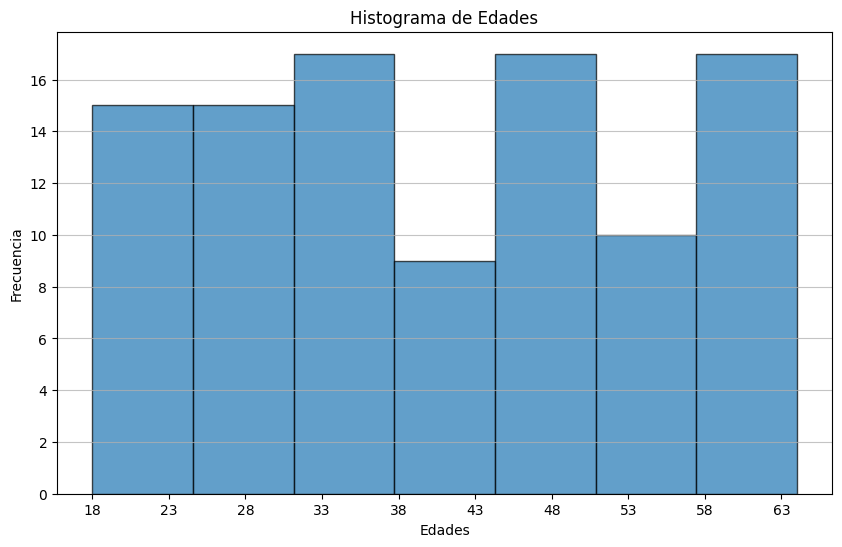

In [6]:
# Paso 4: Construir el histograma
plt.figure(figsize=(10, 6))
plt.hist(edades, bins=num_clases, edgecolor='black', alpha=0.7)
plt.title('Histograma de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(range(18, 66, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()

El paso de la tabla de frecuencias al histograma implica transformar los datos tabulados en una representación gráfica que ilustra la distribución de un conjunto de datos. A continuación, te explico detalladamente cómo se realiza esta transición y su significancia.

1. Entender la Tabla de Frecuencias
Una tabla de frecuencias muestra cómo se distribuyen los valores de una variable a través de intervalos (o clases). Cada fila de la tabla representa un intervalo de valores y su correspondiente frecuencia (la cantidad de datos que caen dentro de ese intervalo). También puede incluir una columna de frecuencias acumuladas.


2. Preparar la Información para el Histograma
Cada intervalo en la tabla de frecuencias equivaldrá a un "bin" (o categoría) en el histograma. La frecuencia asociada a cada intervalo determinará la altura de las barras en el histograma.

Intervalos: Cada intervalo de la tabla se convertirá en un bar del histograma.
Frecuencias: La altura de cada bar será igual a la frecuencia de datos en ese intervalo.
3. Construcción del Histograma
El histograma es un gráfico de barras donde las barras están agrupadas para representar la frecuencia de datos en rangos contiguos.

Ejes Axiales:

El eje X (horizontal) representa los intervalos de clase (por ejemplo, rangos de edades).
El eje Y (vertical) muestra la frecuencia de cada intervalo.
Dibujo de las Barras:

Para cada intervalo, se traza una barra cuya base es el tamaño del intervalo (por ejemplo, de 18 a 20) y cuya altura es igual a la frecuencia de ese intervalo.
Las barras son contiguas (sin espacio entre ellas) si se representan intervalos adyacentes, lo que sugiere que los datos son continuos.
4. Interpretación del Histograma
El histograma permite visualizar de forma clara la distribución de los datos:

Forma de la distribución: Puedes identificar si tiene una forma normal, sesgada, bimodal, etc.
Concentración de datos: Puedes ver fácilmente en qué intervalo hay más agrupación de datos (mayor frecuencia).
Diferencias en el rango: Los histogramas pueden mostrar cuántos datos se encuentran en los extremos del rango o si hay valores atípicos.

(array([15., 15., 17.,  9., 17., 10., 17.]),
 array([18.        , 24.57142857, 31.14285714, 37.71428571, 44.28571429,
        50.85714286, 57.42857143, 64.        ]),
 <BarContainer object of 7 artists>)

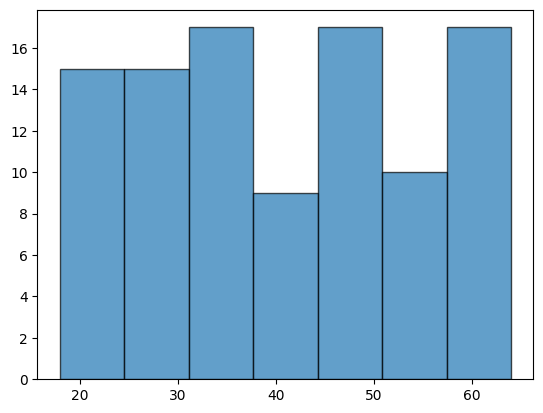

In [7]:
# Código donde tenemos los siguientes valores
plt.hist(edades,              # la serie que hemos guardado con el nombre "edades"
         bins=num_clases,     # El número de clases que hemos decidido
         edgecolor='black',   # el color del borde de las columnas
         alpha=0.7)           # El "tono" de trasparencia

# El gráfico de cajas

Crear un conjunto de datos que incluya valores normales y outliers. Puedes usar numpy para generar datos aleatorios.

In [9]:
# Generar una serie de datos
np.random.seed(0)  # Para reproducibilidad
datos_normales = np.random.normal(loc=50, scale=10, size=100)  # 100 datos normales
outliers = np.array([10, 110, 115, 120])  # Valores atípicos definidos
datos = np.concatenate([datos_normales, outliers])  # Combinar los datos

# Crear un DataFrame de pandas
df = pd.DataFrame(datos, columns=['Valores'])
print(df.describe())  # Describir los datos para ver estadísticas generales

          Valores
count  104.000000
mean    52.065462
std     15.288602
min     10.000000
25%     43.561433
50%     51.242936
75%     57.992268
max    120.000000


In [11]:
# Vamos a entender la función .describe() en python
data = {
    'Edad': [23, 25, 35, 30, 40, 31, 45, 60, 18, 29],
    'Salario': [50000, 60000, 80000, 70000, 90000, 30000, 100000, 110000, 20000, 35000],
}

df = pd.DataFrame(data)

# Usar .describe() para obtener un resumen estadístico
resumen = df.describe()
print(resumen)

            Edad        Salario
count  10.000000      10.000000
mean   33.600000   64500.000000
std    12.203825   30772.462437
min    18.000000   20000.000000
25%    26.000000   38750.000000
50%    30.500000   65000.000000
75%    38.750000   87500.000000
max    60.000000  110000.000000


 es una herramienta poderosa para resumir y entender la distribución y características de tus datos de manera rápida, lo que resulta esencial en el proceso de análisis de datos.

 Cuando se llama a .describe() en un DataFrame, este generará un nuevo DataFrame que contiene las siguientes estadísticas para cada columna numérica:

count: Número total de valores no nulos.\
mean: Media (promedio) de los valores.\
std: Desviación estándar, que mide la dispersión de los datos respecto a la media.\
min: Valor mínimo en la columna.\
25%: Primer cuartil (Q1), que representa el 25% de los datos.\
50%: Mediana o segundo cuartil (Q2).\
75%: Tercer cuartil (Q3), que representa el 75% de los datos.\
max: Valor máximo en la columna.\

Si se aplica a columnas categóricas (si se incluye con include), también se mostrarán:

count: Número total de valores no nulos.\
unique: Número de categorías únicas.\
top: La categoría más frecuente.\
freq: Frecuencia de la categoría más frecuente.

Crear y visualizar el gráfico de cajas.

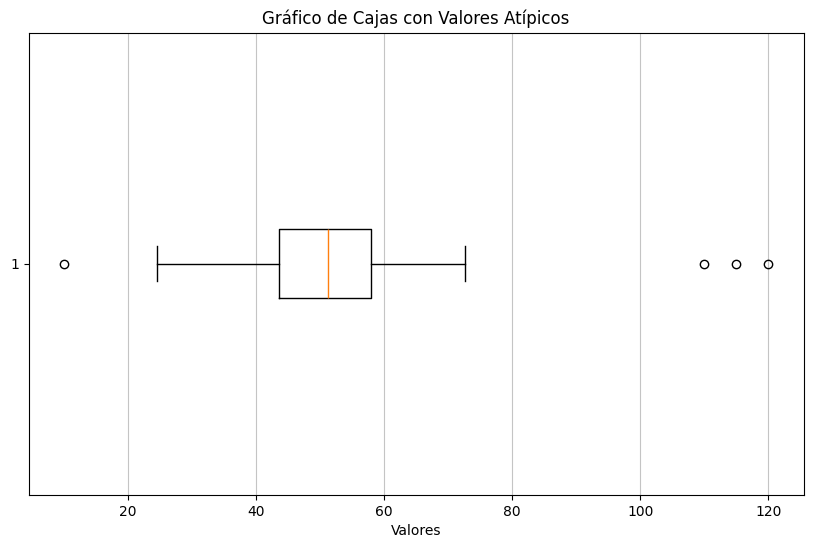

In [10]:
# Visualizar el Gráfico de Cajas
plt.figure(figsize=(10, 6))
plt.boxplot(df['Valores'], vert=False)  # Graficar de forma horizontal
plt.title('Gráfico de Cajas con Valores Atípicos')
plt.xlabel('Valores')
plt.grid(axis='x', alpha=0.75)

# Mostrar el gráfico
plt.show()

##Interpretar el Gráfico
Ejecuta la celda para mostrar el gráfico. El gráfico de cajas mostrará:

La **mediana** de los datos (la línea dentro de la caja).
El primer cuartil (Q1) y el tercer cuartil (Q3) que muestran el rango intercuartílico (IQR).

Los "**bigotes**" que se extienden hacia afuera son parte del conjunto de datos que no son considerados valores atípicos. Por defecto, se extienden hasta 1.5 * IQR.

Los puntos individuales fuera de los bigotes representan los outliers (valores atípicos), que en este caso son los números 10, 110, 115 y 120.

##Conclusiones
Identificación de Valores Atípicos: Los outliers pueden indicar variaciones o errores en los datos, y pueden tener un impacto significativo en el análisis estadístico, por lo que es importante identificarlos.

Visualización Efectiva: Un gráfico de cajas es una forma eficaz de resumir la distribución de un conjunto de datos, facilitar la comparación entre diferentes conjuntos y ayudar a identificar los outliers.

**Resumen**

Siguiendo estos pasos, habrás creado un gráfico de cajas con valores atípicos en Google Colaboratory. Este entorno facilita la escritura y ejecución de código Python para análisis de datos y visualización de manera colaborativa. Puedes guardar tu proyecto en Google Drive y compartirlo fácilmente con otros.

# Ejemplo de datos ordinales

Crea un DataFrame con valores ordinales. En una nueva celda, define un conjunto de datos que contenga clasificaciones ordinales. Copia y pega lo siguiente y ejecútalo:

In [12]:
# Crear un DataFrame con valores ordinales
data = {
    'Satisfacción': ['Bajo', 'Medio', 'Alto', 'Bajo', 'Medio', 'Alto', 'Alto', 'Medio', 'Bajo', 'Medio'],
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

  Satisfacción
0         Bajo
1        Medio
2         Alto
3         Bajo
4        Medio
5         Alto
6         Alto
7        Medio
8         Bajo
9        Medio


Definir el orden de los valores ordinales. Debemos definir que estamos tratando con datos ordinales. Utiliza el siguiente código:

In [14]:
# Convertir la columna de Satisfacción en un tipo categórico ordinal
orden_satisfaccion = ['Bajo', 'Medio', 'Alto']
df['Satisfacción'] = pd.Categorical(df['Satisfacción'], categories=orden_satisfaccion, ordered=True)
# Contar las frecuencias de cada categoría
conteo_satisfaccion = df['Satisfacción'].value_counts() # la función value_counts() realiza un conteo de valores categóricos
print(conteo_satisfaccion)

Satisfacción
Medio    4
Bajo     3
Alto     3
Name: count, dtype: int64


<ipython-input-17-814bed05abf3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfacción', data=df, palette='pastel', order=orden_satisfaccion)


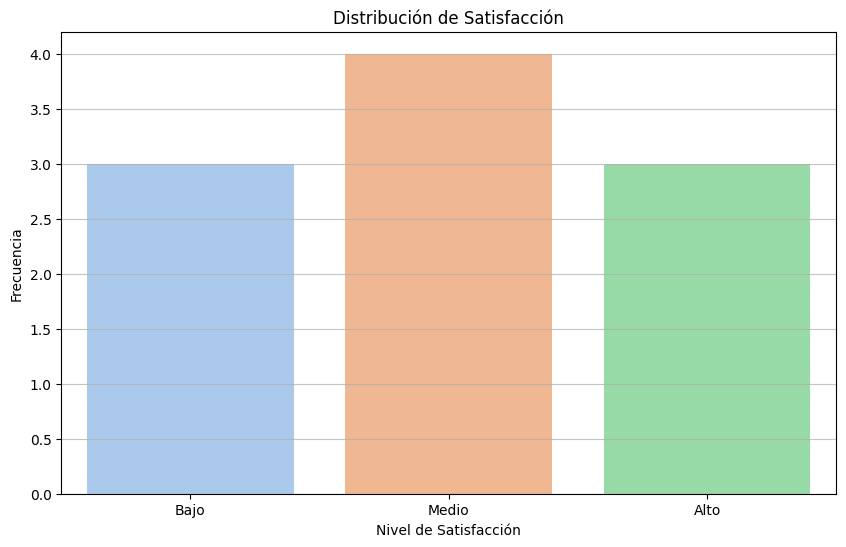

In [17]:
# Visualizar el conteo de Satisfacción con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfacción', data=df, palette='pastel', order=orden_satisfaccion)
plt.title('Distribución de Satisfacción')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()

# Interpretar los resultados
Conteo de Frecuencias: Al ejecutar el conteo, podrás observar cuántas veces cada nivel de satisfacción aparece en el DataFrame.

Gráfico de Barras: El gráfico de barras mostrará visualmente la distribución de los niveles de satisfacción. Podrás ver claramente cuál es el nivel más común y cómo se distribuyen los demás.

También lo podemos expresar en formato "de tarta de queso" o circular.

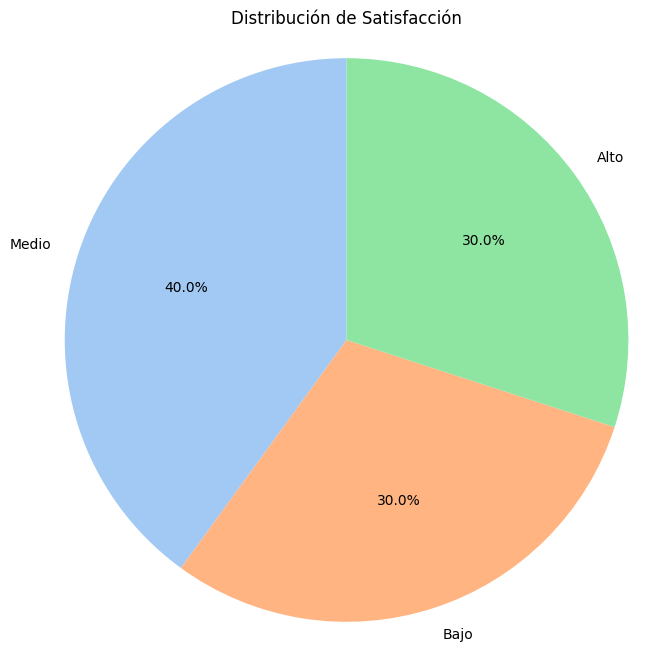

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(conteo_satisfaccion, labels=conteo_satisfaccion.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(conteo_satisfaccion)))
plt.title('Distribución de Satisfacción')
plt.axis('equal')  # Igualar el aspecto para que sea un círculo
plt.show()

Ahora le voy a mandar que me haga un gráfico mediante la IA generativa.
Selecciono en el cuadro de abajo "crear código con IA"

Le indico que "Dibuja un gráfico de barras horizontales de color azul, verde y amarillo con los datos anteriores"

Me aparece un código que ejecuto, yo no he hecho nada más.

## Ejercicio:

Id probando órdenes hasta tener un gráfico a vuestro gusto. Podéis id detallando cómo queréis el gráfico.

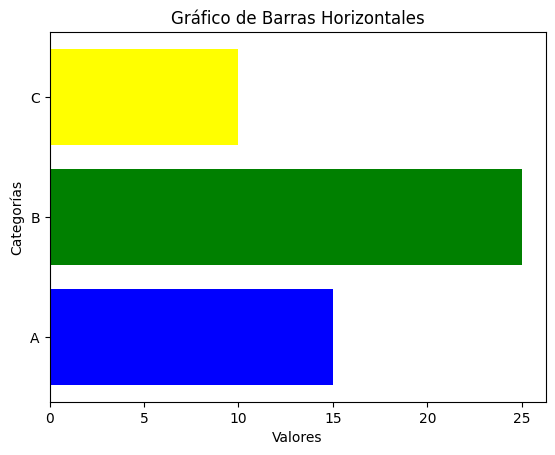

In [19]:
# prompt: Dibuja un gráfico de barras horizontales de color azul, verde y amarillo con los datos anteriores

import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos)
categorias = ['A', 'B', 'C']
valores = [15, 25, 10]
colores = ['blue', 'green', 'yellow']

# Crear el gráfico de barras horizontales
plt.barh(categorias, valores, color=colores)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Categorías')
plt.title('Gráfico de Barras Horizontales')

# Mostrar el gráfico
plt.show()